# WINE QUALITY PREDICTION BY USING CLASSIFICATION


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv("winequality-red.csv")

# DATA UNDERSTANDING

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
df.shape


(1599, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

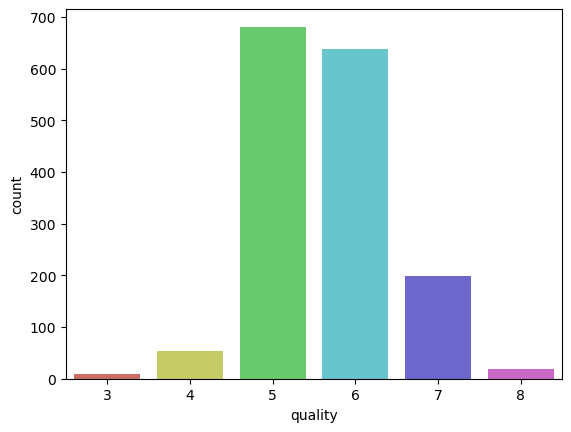

In [22]:
sns.countplot(x =df ["quality"],palette='hls')

# data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

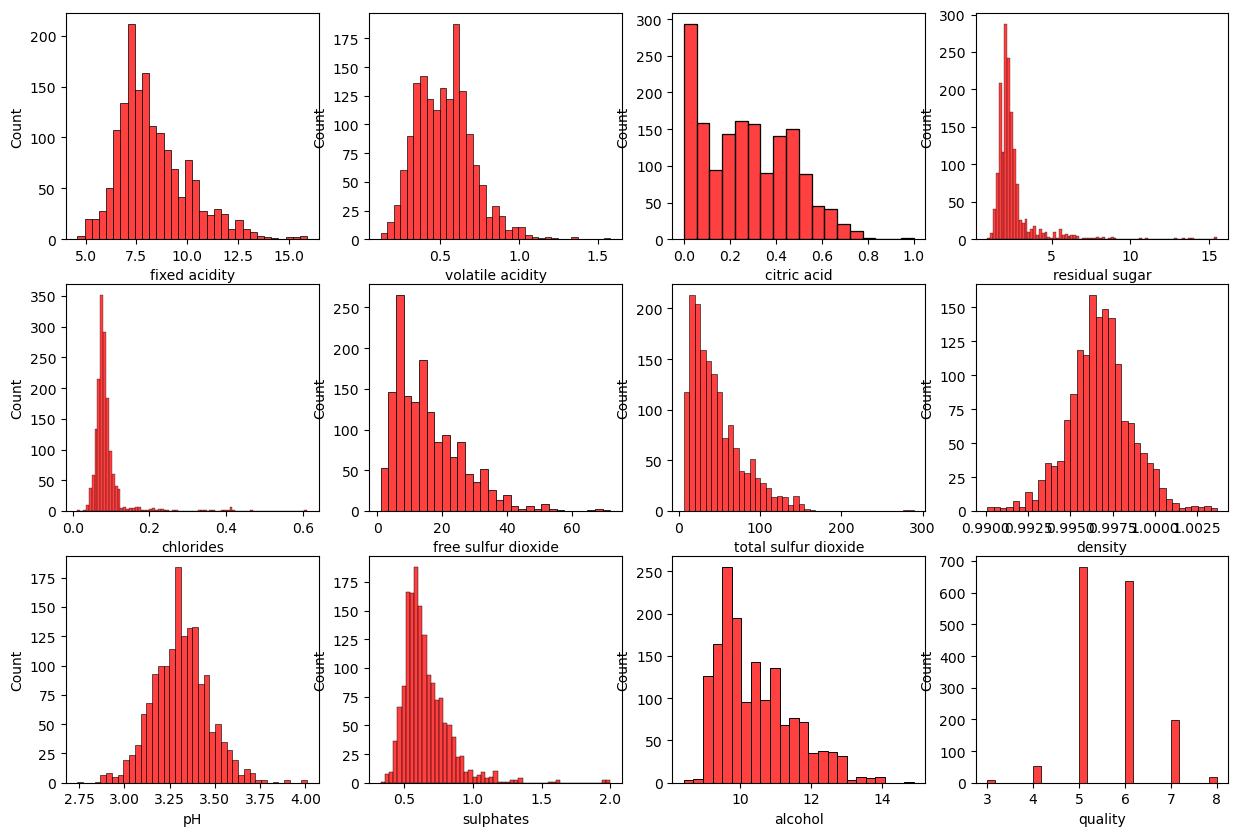

In [23]:
num_fea=df.select_dtypes(exclude='object')
fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k=0
for i in range(3):
    for j in range(4):
         sns.histplot(df[df.columns[k]],ax=axes[i][j],color='red')
         k+=1
plt.show


In [24]:
df["residual sugar"]=np.log(df["residual sugar"])
df[" chlorides"]=np.log(df["chlorides"])
df["free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["sulphates"]=np.log(df["sulphates"])


<function matplotlib.pyplot.show(close=None, block=None)>

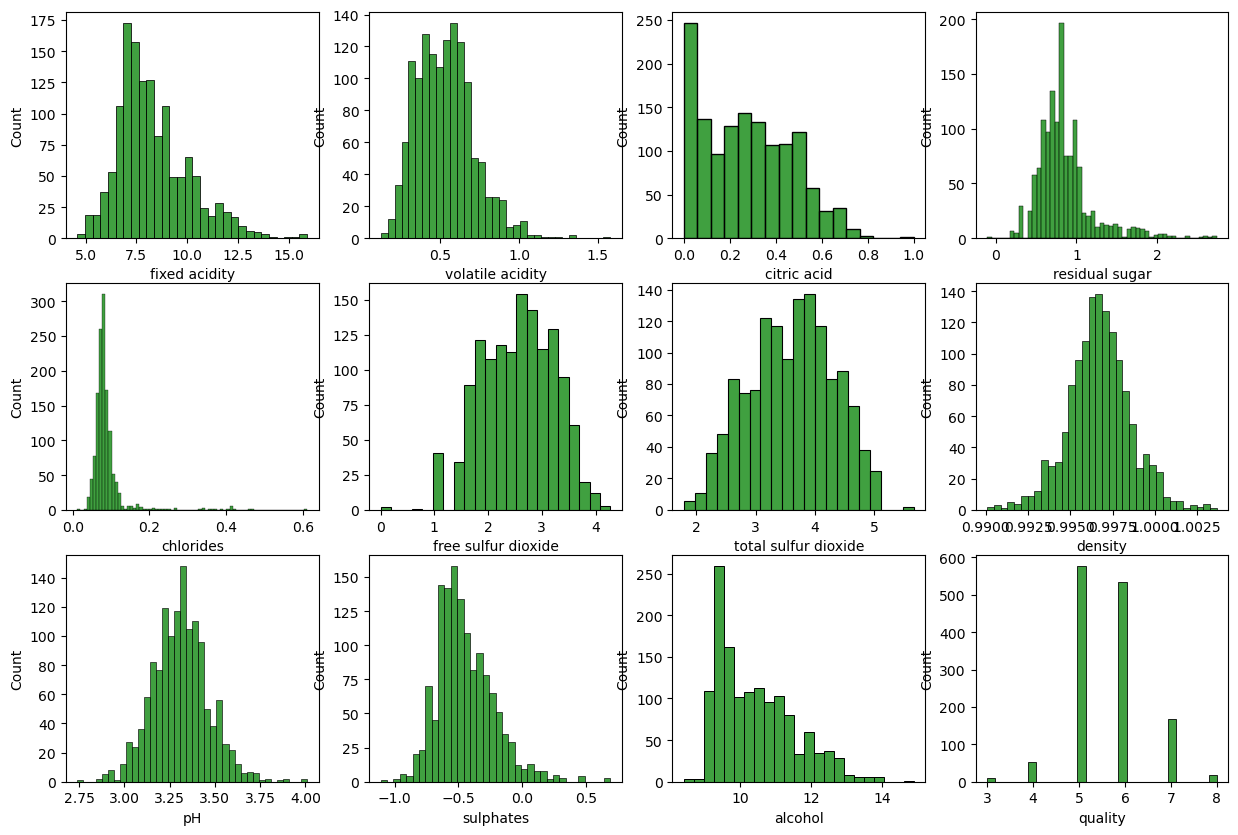

In [26]:
num_fea=df.select_dtypes(exclude='object')
fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(15,10))
k=0
for i in range(3):
    for j in range(4):
         sns.histplot(df[df.columns[k]],ax=axes[i][j],color='green')
         k+=1
plt.show


In [28]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
 chlorides              0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [31]:
x=df.drop('quality',axis='columns')
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,chlorides
0,7.4,0.70,0.00,0.641854,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,9.4,-2.577022
1,7.8,0.88,0.00,0.955511,0.098,3.218876,4.204693,0.9968,3.20,-0.385662,9.8,-2.322788
2,7.8,0.76,0.04,0.832909,0.092,2.708050,3.988984,0.9970,3.26,-0.430783,9.8,-2.385967
3,11.2,0.28,0.56,0.641854,0.075,2.833213,4.094345,0.9980,3.16,-0.544727,9.8,-2.590267
5,7.4,0.66,0.00,0.587787,0.075,2.564949,3.688879,0.9978,3.51,-0.579818,9.4,-2.590267


In [32]:
y=df['quality']
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [33]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

imbalanced to balanced

In [34]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x.fillna(0),y)



In [35]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

# feauture scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x)
x.head()




,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.519997,0.408687,-1.266483,-0.666039,-0.256848,0.037397,0.255985,0.728389,1.148650,-0.575559,-1.145331,-0.200402
1,-0.279188,1.101629,-1.266483,0.231034,0.237232,1.267235,1.228160,0.196476,-0.871522,0.292478,-0.810694,0.603971
2,-0.279188,0.639668,-1.070221,-0.119613,0.102483,0.502012,0.919010,0.302858,-0.480521,0.090753,-0.810694,0.404079
3,1.767683,-1.208177,1.481178,-0.666039,-0.279306,0.689508,1.070011,0.834771,-1.132189,-0.418672,-0.810694,-0.242309
4,-0.519997,0.254700,-1.266483,-0.820674,-0.279306,0.287645,0.488904,0.728389,1.148650,-0.575559,-1.145331,-0.242309


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,)

# logistic regression
  


In [38]:
#  Apply LogRegression
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(x_train, y_train)
LogReg_acc=round(model_LogReg.score(x_test, y_test)*100)
LogReg_acc

60

# support vector machine


In [39]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
SVR_Accuracy

87

# decission tree


In [40]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
DTR_Accuracy

83

# random forest

In [41]:

# random forest regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(x_test)) * 100)
RFR_Accuracy

91

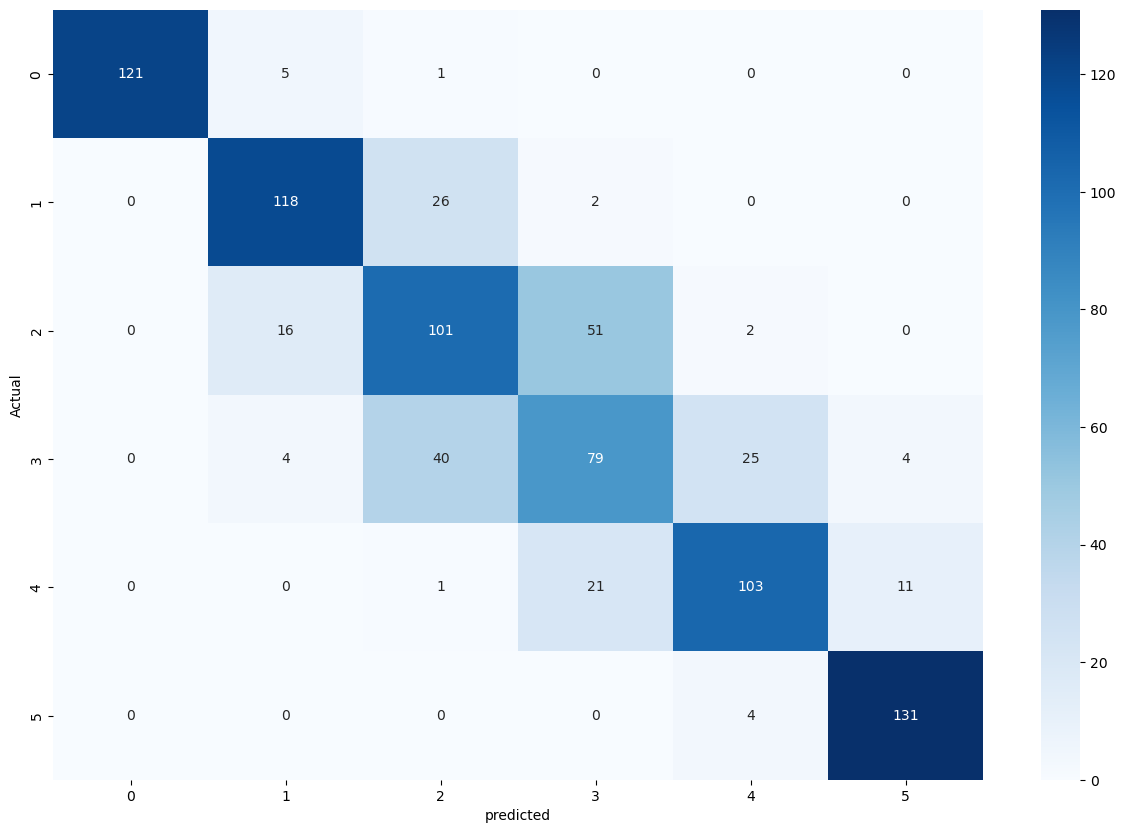

array([[121,   5,   1,   0,   0,   0],
       [  0, 118,  26,   2,   0,   0],
       [  0,  16, 101,  51,   2,   0],
       [  0,   4,  40,  79,  25,   4],
       [  0,   0,   1,  21, 103,  11],
       [  0,   0,   0,   0,   4, 131]])

In [42]:
# heatmap for confusion matrix (ensure cm exists and is 2-d)
from sklearn.metrics import confusion_matrix
import numpy as np

try:
    # check if cm is defined and 2_d
    if not ('cm' in globals() and hasattr(cm, "ndim") and cm.ndim == 2):
         raise NameError
except NameError:
    # round predictions to nearest integer since RF_model is a regressor
    cm = confusion_matrix(y_test, np.round(RF_model.predict(x_test)).astype(int))

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
cm


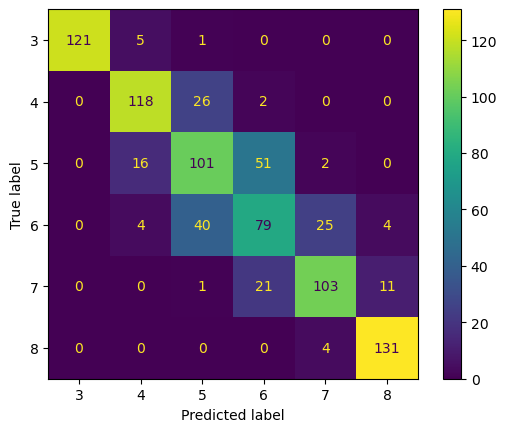

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [3,4,5,6,7,8])
cm_display.plot()
plt.show()


In [44]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':8.9,
    'volatile acidity':3.70,
    'citric acid':4.00,
    'residual sugar':3.999,
    'chlorides':3.9,
    'free sulfur dioxide':2.56,
    'total sulfur dioxide':98,
    'density':9.7,
    'pH':9,
    'sulphates':9.8,
    'alcohol':9.3
}

In [45]:
import pickle
filename = 'scaler_model.csv'
pickle.dump(scaler, open(filename, 'wb'))


In [46]:
import pickle
filename = 'finalized_RFmodel.sav'
pickle.dump(RF_model, open(filename, 'wb'))